In [1]:
!pip install transformers
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/sequences/sequences2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np 
import dataset_flickr7k
import importlib
import nltk
nltk.download('punkt')
import csv
from collections import defaultdict

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data_args = {'stage': 'val',
            'ds_path' : "/content/drive/MyDrive/Colab Notebooks/sequences/sequences2", 
            'captions_dir': "",
            'captions_fname': 'results_new.csv',
            'images_dir': '/images_split',
            'freq_threshold': 5}

val_data = dataset_flickr7k.Flickr7kData(**data_args)

length = 2000
stage:  val
ds_path:  /content/drive/MyDrive/Colab Notebooks/sequences/sequences2
captions_f:  /content/drive/MyDrive/Colab Notebooks/sequences/sequences2/results_new.csv
imgs_dir:  /content/drive/MyDrive/Colab Notebooks/sequences/sequences2/images_split/val
Initialized 7736 words in vocabulary


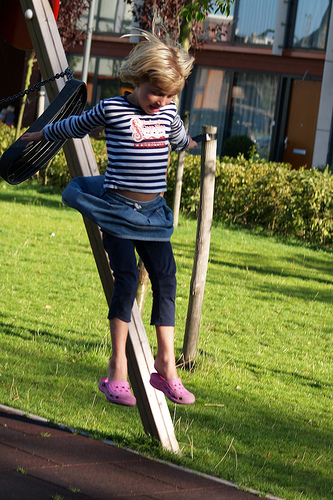

In [4]:
val_data.plot_img(20)

In [5]:
str(val_data.img_files_dict[20]).split('.')[0]

'2759596272'

In [6]:
cap = val_data.get_image_caption(20)
cap

'The little girl a striped shirt jumped out of a swing .'

In [7]:
val_data.load_img(20)

tensor([[[-1.9980, -2.0323, -2.0323,  ..., -1.5870, -1.7583, -1.0048],
         [-1.9809, -1.9980, -2.0152,  ..., -1.6384, -1.7069, -0.8164],
         [-1.9809, -1.9980, -2.0152,  ..., -1.6727, -1.6042, -0.5767],
         ...,
         [-1.5870, -1.5699, -1.5699,  ..., -1.2617, -1.0733, -1.3644],
         [-1.6042, -1.6213, -1.6213,  ..., -1.2274, -1.0733, -1.2274],
         [-1.6384, -1.6555, -1.6384,  ..., -1.2445, -1.1589, -1.0733]],

        [[-1.9657, -1.9657, -1.9832,  ..., -1.0728, -1.4230, -0.5651],
         [-1.9657, -1.9832, -2.0007,  ..., -1.1604, -1.3529, -0.4076],
         [-1.9657, -1.9832, -2.0182,  ..., -1.2654, -1.2304, -0.2150],
         ...,
         [-1.5105, -1.5105, -1.4930,  ..., -0.7577, -0.6001, -0.8978],
         [-1.5455, -1.5630, -1.5455,  ..., -0.6702, -0.4601, -0.6702],
         [-1.5630, -1.5805, -1.5805,  ..., -0.7052, -0.5826, -0.5476]],

        [[-1.8044, -1.8044, -1.8044,  ..., -0.6890, -1.0550, -0.1487],
         [-1.7870, -1.8044, -1.8044,  ..., -0

In [8]:
idx,X,y = val_data[22]
print(idx)
print(X)
print(y)
 

22
tensor([[[-1.9980, -2.0323, -2.0323,  ..., -1.5870, -1.7583, -1.0048],
         [-1.9809, -1.9980, -2.0152,  ..., -1.6384, -1.7069, -0.8164],
         [-1.9809, -1.9980, -2.0152,  ..., -1.6727, -1.6042, -0.5767],
         ...,
         [-1.5870, -1.5699, -1.5699,  ..., -1.2617, -1.0733, -1.3644],
         [-1.6042, -1.6213, -1.6213,  ..., -1.2274, -1.0733, -1.2274],
         [-1.6384, -1.6555, -1.6384,  ..., -1.2445, -1.1589, -1.0733]],

        [[-1.9657, -1.9657, -1.9832,  ..., -1.0728, -1.4230, -0.5651],
         [-1.9657, -1.9832, -2.0007,  ..., -1.1604, -1.3529, -0.4076],
         [-1.9657, -1.9832, -2.0182,  ..., -1.2654, -1.2304, -0.2150],
         ...,
         [-1.5105, -1.5105, -1.4930,  ..., -0.7577, -0.6001, -0.8978],
         [-1.5455, -1.5630, -1.5455,  ..., -0.6702, -0.4601, -0.6702],
         [-1.5630, -1.5805, -1.5805,  ..., -0.7052, -0.5826, -0.5476]],

        [[-1.8044, -1.8044, -1.8044,  ..., -0.6890, -1.0550, -0.1487],
         [-1.7870, -1.8044, -1.8044,  ...,